In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.integrate as spi

In [2]:
path = "/Users/dillon/Desktop"
data = h5py.File(f"{path}/data.h5", "r")

SFH = data["SFH"]

In [3]:
DTD = data["DTD"]

event_types = ["Ia", "IIP", "II", "Ib", "Ic", "LGRB", "PISNe", "BBH", "BHNS", "BNS"]
metallicities = ["z001", "z002", "z003", "z004", "z006", "z008", "z010", "z014", "z020", "z030", "z040", "zem4", "zem5" ]


event_total = {}
for i in (metallicities):
    event_total[i] = {}
    for j in event_types:
        event_total[i][j] = DTD[j][i][:]
    event_total[i]["CCSN"] = event_total[i]["II"] + event_total[i]["Ib"] + event_total[i]["Ic"] + event_total[i]["IIP"]


Z0 = metallicities[0] 
Z1 = metallicities[1] 
Z2 = metallicities[2] 
Z3 = metallicities[3] 
Z4 = metallicities[4] 
Z5 = metallicities[5] 
Z6 = metallicities[6] 
Z7 = metallicities[7] 
Z8 = metallicities[8] 
Z9 = metallicities[9] 
Z10 = metallicities[10] 
Z11 = metallicities[11] 
Z12 = metallicities[12] 


x0 = event_total[Z0]
x1 = event_total[Z1]
x2 = event_total[Z2]
x3 = event_total[Z3]
x4 = event_total[Z4]
x5 = event_total[Z5]
x6 = event_total[Z6]
x7 = event_total[Z7]
x8 = event_total[Z8]
x9 = event_total[Z9]
x10 = event_total[Z10]
x11 = event_total[Z11]
x12 = event_total[Z12]




DTD_CCSN = np.array(x0["CCSN"] + x1["CCSN"] + + x2["CCSN"] + x3["CCSN"] + x4["CCSN"] + x5["CCSN"] + x6["CCSN"] + x7["CCSN"] + x8["CCSN"] + x9["CCSN"] + x10["CCSN"] + x11["CCSN"] + x12["CCSN"]) 


bin_centres = data['DTD'].attrs['bin_centres']

In [4]:
len(DTD_CCSN)

51

##### SFH

In [5]:
z = np.linspace(0, 20, 10000)

M_D = 0.015 * (1 + z)**2.7 / (1 + ((1 + z) / 2.9)**5.6)

trans_M_D = 0.66 * M_D

In [6]:
h = SFH.attrs['h']
omega_M = SFH.attrs['omega_M']
omega_L = SFH.attrs['omega_L']

In [7]:
@np.vectorize
def lookback(z, omega1, omega2, hubble):
    
    def f(x):
        a = np.sqrt(omega1*(1+x)**3 + omega2)
        return 1/((1+x)*a)
    t_hubble = (1/(100*hubble))*3.0856776*10**19
    return t_hubble *spi.quad(f, 0, z)[0]/(60*60*24*365.2388526*1e9)

Text(0.5, 0, 'Lookback Time (Gyr)')

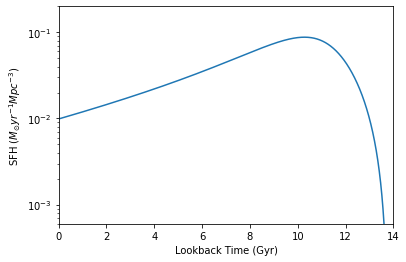

In [8]:
plt.plot(lookback(z, omega_M, omega_L, h), trans_M_D)
plt.xlim(0, 14)
plt.ylim(6e-4,2e-1)
plt.yscale('log')
plt.ylabel('SFH ($M_{\odot} yr^{-1} Mpc^{-3}$)')
plt.xlabel('Lookback Time (Gyr)')

In [9]:
num_bins = 50


bin_lookback_times = np.linspace(13.6, 0, num_bins + 1)

integrated_SFH = np.zeros(num_bins)


for i in range(num_bins):

    bin_mask = np.logical_and(lookback(z, omega_M, omega_L, h) <= bin_lookback_times[i], lookback(z, omega_M, omega_L, h) > bin_lookback_times[i + 1])
    bin_M_D = trans_M_D[bin_mask][::-1] 
    integrated_SFH[i] = spi.simps(bin_M_D, z[bin_mask][::-1])  


integrated_SFH = np.abs(integrated_SFH)

In [10]:
integrated_SFH

array([0.0139493 , 0.01644406, 0.01811781, 0.0193074 , 0.02012832,
       0.02053183, 0.02039589, 0.01994215, 0.0188173 , 0.01777419,
       0.01605487, 0.01429558, 0.01279378, 0.01104352, 0.0095305 ,
       0.00832142, 0.00713182, 0.00614651, 0.00522881, 0.0045149 ,
       0.00386518, 0.00338746, 0.00295367, 0.00256324, 0.00221422,
       0.0019838 , 0.00177331, 0.00151223, 0.00134764, 0.00119879,
       0.00100703, 0.00100074, 0.00083465, 0.00073682, 0.00069395,
       0.00061018, 0.00057506, 0.0005035 , 0.00047505, 0.00041401,
       0.00035939, 0.00037082, 0.00029257, 0.00030505, 0.00026255,
       0.00024888, 0.00021262, 0.00020212, 0.00019195, 0.0001623 ])

In [11]:
bin_size_gyrs = np.abs(np.diff(bin_lookback_times))
bin_size_gyrs = bin_size_gyrs[0]
bin_size_gyrs = round(bin_size_gyrs, 2)

##### DTD

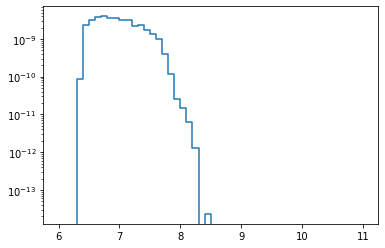

In [12]:
plt.step(bin_centres, DTD_CCSN)
plt.yscale('log')

In [13]:
linear_bin_centres = 10**bin_centres
linear_bin_centres_gyrs = linear_bin_centres / 1e9

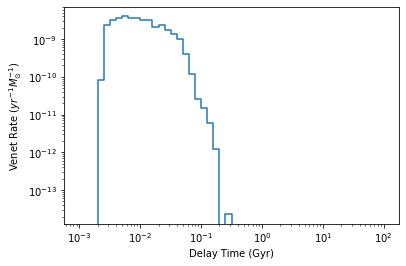

In [14]:
plt.step(linear_bin_centres_gyrs, DTD_CCSN)
plt.xlabel('Delay Time (Gyr)')
plt.ylabel('Venet Rate ($yr^{-1} M_{\odot}^{-1}$)')
plt.xscale('log')
plt.yscale('log')

In [15]:
mask = (linear_bin_centres_gyrs >= 0) & (linear_bin_centres_gyrs <= 13.6)


filtered_linear_bin_centres_gyrs = linear_bin_centres_gyrs[mask]
filtered_DTD = DTD_CCSN[mask]

In [16]:
bin_edges = np.arange(0, 13.6 + bin_size_gyrs, bin_size_gyrs)


digitized = np.digitize(filtered_linear_bin_centres_gyrs, bin_edges)


integrated_DTD = np.zeros(len(bin_edges) - 1)


for i in range(1, len(bin_edges)):
    bin_mask = (digitized == i)
    
    if np.any(bin_mask):  
        integrated_DTD[i - 1] = spi.simps(filtered_DTD[bin_mask], filtered_linear_bin_centres_gyrs[bin_mask])



In [17]:
integrated_DTD

array([1.18842697e-10, 5.28807392e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [18]:
rates = np.zeros(num_bins)

for i in range(num_bins):
    rate = 0.0  
    for j in range(i + 1):
        
        rate += integrated_SFH[i] * integrated_DTD[i - j]
    rates[i] = rate / bin_size_gyrs  

In [19]:
rates

array([6.13989956e-12, 7.23801847e-12, 7.97473910e-12, 8.49834833e-12,
       8.85968433e-12, 9.03729140e-12, 8.97745591e-12, 8.77773896e-12,
       8.28262602e-12, 7.82349033e-12, 7.06671359e-12, 6.29234288e-12,
       5.63131241e-12, 4.86091663e-12, 4.19494613e-12, 3.66275826e-12,
       3.13914360e-12, 2.70544825e-12, 2.30151263e-12, 1.98728015e-12,
       1.70129876e-12, 1.49102473e-12, 1.30008775e-12, 1.12823499e-12,
       9.74610704e-13, 8.73187864e-13, 7.80539906e-13, 6.65625347e-13,
       5.93177584e-13, 5.27658546e-13, 4.43252390e-13, 4.40485307e-13,
       3.67380493e-13, 3.24320064e-13, 3.05451295e-13, 2.68575304e-13,
       2.53120099e-13, 2.21621622e-13, 2.09096312e-13, 1.82229514e-13,
       1.58187704e-13, 1.63220720e-13, 1.28776600e-13, 1.34269757e-13,
       1.15562900e-13, 1.09546789e-13, 9.35859225e-14, 8.89663710e-14,
       8.44892174e-14, 7.14361557e-14])

In [20]:
bin_centers_linear = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_centers_linear = bin_centers_linear[:-1]

<ipython-input-21-dddae8659614>:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 14)


(0.10728821227199216, 14)

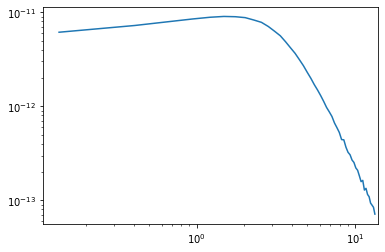

In [21]:
plt.plot(bin_centers_linear, rates)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0, 14)